### 2020 June 7 ICME event

figures and animations of 3DCORE fitting results

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap
from matplotlib import rc

import numpy as np
from datetime import timedelta
import time
import pickle
import seaborn as sns
import os
import urllib
import json
import warnings
import importlib
import multiprocessing

import astropy
import astropy.constants as const
import astropy.units as unit
from astropy.coordinates import SkyCoord


import sunpy
import sunpy.time
from sunpy.time import parse_time

import heliopy.spice as spice
import heliopy.data.spice as spicedata

from sunpy.coordinates import frames

import py3dcore
import heliosat


#Convert this notebook to a script with jupyter nbconvert --to script cme_rate.ipynb
#os.system('jupyter nbconvert --to script psp_3dcore.ipynb')    

#%matplotlib inline
#matplotlib.use('Qt5Agg')
#matplotlib.use('Agg')
#warnings.filterwarnings('ignore') # some numpy mean-of-empty-slice runtime warnings

########### make directories first time
resdir='results'
if os.path.isdir(resdir) == False: os.mkdir(resdir)

datadir='data'
if os.path.isdir(datadir) == False: os.mkdir(datadir)

outputdirectory='results/plots'
if os.path.isdir(outputdirectory) == False: os.mkdir(outputdirectory)
    
    
animdirectory='results/animations_june7'
if os.path.isdir(animdirectory) == False: os.mkdir(animdirectory)
    
#rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


#--------------------- load solar orbiter data (made with heliocats)
filemag='data/mag/solo_2020_june_october_rtn.p'
sm=pickle.load(open(filemag, "rb" ) ) 


#--------------------- load Wind data
filewin='data/wind_2018_now_gse.p'
[win,hwin]=pickle.load(open(filewin, "rb" ) )

#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-20 17:08').datetime)[0]
win.bt[windspike_ind[0:2]]=np.nan
win.bx[windspike_ind[0:2]]=np.nan
win.by[windspike_ind[0:2]]=np.nan
win.bz[windspike_ind[0:2]]=np.nan


#set wind awkward data points to nan
windspike_ind=np.where(win.time > parse_time('2020-04-21 01:20').datetime)[0]
win.bt[windspike_ind[0:1]]=np.nan
win.bx[windspike_ind[0:1]]=np.nan
win.by[windspike_ind[0:1]]=np.nan
win.bz[windspike_ind[0:1]]=np.nan


#cut out data around event from wind data time series
windbegin_ind=np.where(win.time > parse_time('2020-04-15 00:00').datetime)[0][0]
windend_ind=np.where(win.time > parse_time('2020-04-22 00:00').datetime)[0][0]
win=win[windbegin_ind:windend_ind]

#------------------------- load position data

#load position data (made with heliocats)
#[psp, bepi, solo, sta, earth, venus, mars, mercury,frame]= \
#      pickle.load( open( 'data/positions_psp_solo_bepi_sta_planets_HEEQ_1hour.p', "rb" ))

#load position data (made with heliocats)
[psp, bepi, solo, earth, mars, mercury,venus,sta,stb]= \
      pickle.load( open( 'data/positions_HCI_1hr.p', "rb" ))

#these are 1 minute HCI positions for the April May 2020 time range
#[psp, bepi, solo, earth, mars, mercury,venus,sta]= \
#      pickle.load( open( 'data/positions_HCI_1minute.p', "rb" ))


#convert to mdates
psp_numtime=mdates.date2num(psp.time)
bepi_numtime=mdates.date2num(bepi.time)
solo_numtime=mdates.date2num(solo.time)
sta_numtime=mdates.date2num(sta.time)
earth_numtime=mdates.date2num(earth.time)




#convert to mdates
#psp_numtime=psp.time+mdates.date2num(np.datetime64('0000-12-31')) 
#bepi_numtime=bepi.time+mdates.date2num(np.datetime64('0000-12-31'))
#solo_numtime=solo.time+mdates.date2num(np.datetime64('0000-12-31'))
#sta_numtime=sta.time+mdates.date2num(np.datetime64('0000-12-31'))
#earth_numtime=earth.time+mdates.date2num(np.datetime64('0000-12-31'))

#new_ordinal = old_ordinal+ mdates.date2num(np.datetime64('0000-12-31')) 



print('done')

done


In [2]:
class SOLO_EXTRA_APRIL(heliosat.SOLO):
    
    def get_data_raw(self, range_start, range_end, data_key, **kwargs):
        
        logger = logging.getLogger(__name__)
        data_key = self.resolve_data_key(data_key)
        range_start = sanitize_datetimes(range_start)
        range_end = sanitize_datetimes(range_end)
        frame = kwargs.get("frame", None)
        frame_cadence = kwargs.get("frame_cadence", None)
        force_download = kwargs.get("force_download", False)
        _data = pickle.load(open("/nas/helio/data/insitu_python/solo_2020_june_july_rtn.p", "rb"))
        time_all = np.array([_[0].replace(tzinfo=datetime.timezone.utc) for _ in _data])
        data_all = np.array([[_[1], _[2], _[3]] for _ in _data]).astype(np.float64)
        tfilter = (time_all > range_start) & (time_all < range_end)
        time_all = time_all[tfilter]
        data_all = data_all[tfilter]
        time_all = np.array([_.timestamp() for _ in time_all])
        
        return time_all, data_all
    
    
C_A = "xkcd:red"
C_B = "xkcd:blue"

C0 = "xkcd:black"
C1 = "xkcd:magenta"
C2 = "xkcd:orange"
C3 = "xkcd:azure"



earth_color='blue'
solo_color='orange'
venus_color='mediumseagreen'
mercury_color='grey'
psp_color='black'
sta_color='red'
bepi_color='coral'



    


### Model Settings

In [3]:
################## FIT ONLY BACK 

obj = py3dcore.fitting.BaseFitter()
obj.load('data/telloni_2021/JUNE_BACK.npy')
t_launch=obj.t_launch

#get index of best fit 
best_fit_ind=np.argmin(obj.epses)

#get parameters from best fit (prefereed)
iparams_arr = np.array([[
    obj.particles[best_fit_ind,0],      # time offset
    obj.particles[best_fit_ind,1],    # l_1 (longitude) *********************
    obj.particles[best_fit_ind,2],    # l_2 (latitude)
    obj.particles[best_fit_ind,3],      # o (inclination, orientation)
    obj.particles[best_fit_ind,4],   # d_1au (frontal width at 1AU)
    obj.particles[best_fit_ind,5],   # delta (cross-section aspect ratio)
    obj.particles[best_fit_ind,6],      # r_0 (initialization distance in solar radii)
    obj.particles[best_fit_ind,7],    # v_0 (initial velocty in)
    obj.particles[best_fit_ind,8],      # tau (magnetic field twist)
    obj.particles[best_fit_ind,9],      # b_s (magnetic field scaling parameter)
    obj.particles[best_fit_ind,10],     #  b_1au (magnetic field strength at 1au)
    obj.particles[best_fit_ind,11],    #magnetic field scaling exponent)
    obj.particles[best_fit_ind,12],    # v_sw (solar wind speed)
    obj.particles[best_fit_ind,13],
    obj.particles[best_fit_ind,14],
    0,
]], dtype=np.float32)


model_obj = py3dcore.models.TTGHv2(t_launch, runs=1, use_gpu=False)
model_obj.update_iparams(iparams_arr, seed=42)


################## FIT FULL INTERVAL

obj2 = py3dcore.fitting.BaseFitter()
obj2.load('data/telloni_2021/JUNE_ALL.npy')
t_launch2=obj2.t_launch

#get index of best fit 
best_fit_ind2=np.argmin(obj2.epses)

#get parameters from best fit (prefereed)
iparams_arr2 = np.array([[
    obj2.particles[best_fit_ind2,0],      # time offset
    obj2.particles[best_fit_ind2,1],    # l_1 (longitude) *********************
    obj2.particles[best_fit_ind2,2],    # l_2 (latitude)
    obj2.particles[best_fit_ind2,3],      # o (inclination, orientation)
    obj2.particles[best_fit_ind2,4],   # d_1au (frontal width at 1AU)
    obj2.particles[best_fit_ind2,5],   # delta (cross-section aspect ratio)
    obj2.particles[best_fit_ind2,6],      # r_0 (initialization distance in solar radii)
    obj2.particles[best_fit_ind2,7],    # v_0 (initial velocty in)
    obj2.particles[best_fit_ind2,8],      # tau (magnetic field twist)
    obj2.particles[best_fit_ind2,9],      # b_s (magnetic field scaling parameter)
    obj2.particles[best_fit_ind2,10],     #  b_1au (magnetic field strength at 1au)
    obj2.particles[best_fit_ind2,11],    #magnetic field scaling exponent)
    obj2.particles[best_fit_ind2,12],    # v_sw (solar wind speed)
    obj2.particles[best_fit_ind2,13],
    obj2.particles[best_fit_ind2,14],
    0,
]], dtype=np.float32)


model_obj2 = py3dcore.models.TTGHv2(t_launch2, runs=1, use_gpu=False)
model_obj2.update_iparams(iparams_arr2, seed=42)

################################

param_strings=['time offset', 'longitude', 'latitude', 'inclination', 'd_1au','width ratio', 'delta (cross-section aspect ratio)', 'r_0 launch radius (R_sun)', 'v_0 launch velocity (km/s)',  'tau (magnetic field twist)','n_a diameter expansion exponent','n_b magnetic field scaling exponent)', 'b_1au (magnetic field strength at 1au)',  'Gamma (solar wind drag coefficient)', 'v_sw (solar wind speed)', 'sigma (measurement noise)']



TP_A =  t_launch + datetime.timedelta(hours=24)
TP_B =  t_launch + datetime.timedelta(hours=121)


print()
print()
print('3DCORE parameters in HCI BACK')
print()
for i in np.arange(0,len(iparams_arr.T)):     
    print(np.round(iparams_arr[0,i],3),param_strings[i])
print(t_launch)


print()
print()
print('3DCORE parameters in HCI FULL')
print()
for i in np.arange(0,len(iparams_arr2.T)):     
    print(np.round(iparams_arr2[0,i],3),param_strings[i])
print(t_launch2)






3DCORE parameters in HCI BACK

0.0 time offset
268.55 longitude
-12.646 latitude
166.743 inclination
0.234 d_1au
0.644 width ratio
1.257 delta (cross-section aspect ratio)
20.0 r_0 launch radius (R_sun)
999.162 v_0 launch velocity (km/s)
23.185 tau (magnetic field twist)
1.14 n_a diameter expansion exponent
1.64 n_b magnetic field scaling exponent)
27.73 b_1au (magnetic field strength at 1au)
1.381 Gamma (solar wind drag coefficient)
293.048 v_sw (solar wind speed)
0.0 sigma (measurement noise)
2020-06-02 02:00:00+00:00


3DCORE parameters in HCI FULL

0.0 time offset
286.649 longitude
27.152 latitude
219.578 inclination
0.342 d_1au
0.881 width ratio
4.456 delta (cross-section aspect ratio)
20.0 r_0 launch radius (R_sun)
665.417 v_0 launch velocity (km/s)
24.183 tau (magnetic field twist)
1.14 n_a diameter expansion exponent
1.64 n_b magnetic field scaling exponent)
37.637 b_1au (magnetic field strength at 1au)
1.032 Gamma (solar wind drag coefficient)
277.782 v_sw (solar wind speed)

### Fit results with error bars in HEEQ

In [4]:
print('back')
l1l2_rtn = heliosat.coordinates.transform_lonlat(obj.t_launch, obj.particles[:, 1:3], "HCI", "HEEQ")
labels = ["${0}$".format(v["label"]) for k, v in py3dcore.models.TTGHv2.default_parameters().items()]

def print_result(arr, lbl):
    print("{0}: {1:.3f} +/- {2:.3f}".format(lbl, np.mean(arr), np.std(arr)))
    
print_result(l1l2_rtn[:, 0], labels[1])
print_result(l1l2_rtn[:, 1], labels[2])

for i in range(3, 16):
    print_result(obj.particles[:, i], labels[i])
    
print()    
print()    
print('full')
l1l2_rtn2 = heliosat.coordinates.transform_lonlat(obj2.t_launch, obj2.particles[:, 1:3], "HCI", "HEEQ")

    
print_result(l1l2_rtn2[:, 0], labels[1])
print_result(l1l2_rtn2[:, 1], labels[2])

for i in range(3, 16):
    print_result(obj2.particles[:, i], labels[i])
    


back
$L_1$: 89.215 +/- 6.519
$L_2$: -17.537 +/- 4.502
$O$: 160.982 +/- 4.358
$D_{1AU}$: 0.265 +/- 0.027
$w$: 0.626 +/- 0.090
$\delta$: 1.182 +/- 0.285
$R_0$: 20.000 +/- 0.000
$V_0$: 665.862 +/- 164.900
$\tau$: 20.224 +/- 3.429
$n_a$: 1.140 +/- 0.000
$n_b$: 1.640 +/- 0.000
$B_{1AU}$: 27.639 +/- 2.698
$\gamma$: 1.353 +/- 0.424
$V_{SW}$: 313.544 +/- 46.132
$\sigma$: 0.617 +/- 0.437


full
$L_1$: 106.972 +/- 3.383
$L_2$: 24.311 +/- 3.753
$O$: 222.646 +/- 3.722
$D_{1AU}$: 0.342 +/- 0.007
$w$: 0.807 +/- 0.070
$\delta$: 4.270 +/- 0.495
$R_0$: 20.000 +/- 0.000
$V_0$: 725.861 +/- 166.854
$\tau$: 21.772 +/- 2.279
$n_a$: 1.140 +/- 0.000
$n_b$: 1.640 +/- 0.000
$B_{1AU}$: 42.372 +/- 4.865
$\gamma$: 1.299 +/- 0.411
$V_{SW}$: 277.265 +/- 20.411
$\sigma$: 0.820 +/- 0.614


### functions 

In [5]:
def measure(obj, sat, t0, t1, frame="HEEQ", bframe="HEEQ", satparams=None):
    if satparams:
        inst = getattr(heliosat, sat)(satparams)
    else:
        inst = getattr(heliosat, sat)()

    #time resolution in seconds
    #t_s = [datetime.datetime.fromtimestamp(_) for _ in np.array(list(range(int(t0.timestamp()), int(t1.timestamp()))))]
    
    #time resolution in minutes
    res_in_days=1/(24*60.)    
    t_s = []
    while t0 < t1:
        t_s.append(t0)
        t0 += timedelta(days=res_in_days)

    #print('data points',len(t_s))
    
    
    o_s = inst.trajectory(t_s, frame=frame)

    if satparams:
        b = heliosat.spice.transform_frame([satparams] * len(t_s), np.array(obj.sim_fields(t_s, o_s))[:, 0, :], frame, bframe)
    else:
        b = heliosat.spice.transform_frame(t_s, np.array(obj.sim_fields(t_s, o_s))[:, 0, :], frame, bframe)

    b[b == 0] = np.nan

    return t_s, np.sqrt(np.sum(b**2, axis=1)), b


#define sun here so it does not need to be recalculated every time
scale=695510/149597870.700*1 #Rs in km, AU in km
# sphere with radius Rs in AU
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:30j]
x = np.cos(u)*np.sin(v)*scale
y = np.sin(u)*np.sin(v)*scale
z = np.cos(v)*scale



def plot_configure(ax, **kwargs):
    view_azim = kwargs.pop("view_azim", -25)
    view_elev = kwargs.pop("view_elev", 25)
    view_radius = kwargs.pop("view_radius", .5)
    
    ax.view_init(azim=view_azim, elev=view_elev)

    ax.set_xlim([-view_radius, view_radius])
    ax.set_ylim([-view_radius, view_radius])
    #adjust scaling as matplotlib lacks automatic aspect ratio setting
    ax.set_zlim([-view_radius*0.75, view_radius*0.75])    

    
    #solar equatorial plane
    #for p in np.arange(-2,2,0.2):
    #    ax.plot([-2,2],[p,p],[0,0],lw=0.5,color='black', alpha=0.2,linestyle='--',zorder=0 )
    #    ax.plot([p,p],[-2,2],[0,0],lw=0.5,color='black', alpha=0.2,linestyle='--',zorder=0 )
    
    #draw sun        
    ls = LightSource(azdeg=140, altdeg=40)  
    ax.plot_surface(x, y, z, rstride=1, cstride=1, color='yellow',lightsource=ls, linewidth=0, antialiased=False,zorder=5)

    p=np.arange(0,2*np.pi,0.01)
    r1=1.0
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r1=0.8
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r1=0.6
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r1=0.4
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r1=0.2
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    
    
    ax.set_axis_off()

def plot_3dcore(ax, obj, t_snap, **kwargs):
    kwargs["alpha"] = kwargs.pop("alpha", .12)
    kwargs["color"] = kwargs.pop("color", "k")
    kwargs["lw"] = kwargs.pop("lw", 1)  

    model_obj.propagate(t_snap)
    wf_model = model_obj.visualize_wireframe(index=0)
    ax.plot_wireframe(*wf_model.T, **kwargs,zorder=3)    
    
   
   
def plot_3dcore_field(ax, obj, step_size=0.005, q0=[1, .1, np.pi/2],**kwargs):

    #initial point is q0
    q0i =np.array(q0, dtype=np.float32).astype(np.float32)    
    fl = model_obj.visualize_fieldline_dpsi(q0i, dpsi=2*np.pi-0.01, step_size=step_size)
    ax.plot(*fl.T, **kwargs)
    

def plot_traj(ax, sat, t_snap, frame="HEEQ", traj_pos=True, traj_major=4, traj_minor=None, **kwargs):
    kwargs["alpha"] = kwargs.pop("alpha", 1)
    kwargs["color"] = kwargs.pop("color", "k")
    kwargs["lw"] = kwargs.pop("lw", 1)
    kwargs["s"] = kwargs.pop("s", 25)
    
    inst = getattr(heliosat, sat)()

    _s = kwargs.pop("s")

    if traj_pos:
        pos = inst.trajectory(t_snap, frame)

        ax.scatter(*pos.T, s=_s, **kwargs)
        
    if traj_major and traj_major > 0:
        traj = inst.trajectory([t_snap + datetime.timedelta(hours=i) for i in range(-traj_major, traj_major)], frame)
        #ax.plot(*traj.T, **kwargs)
        
    if traj_minor and traj_minor > 0:
        traj = inst.trajectory([t_snap + datetime.timedelta(hours=i) for i in range(-traj_minor, traj_minor)], frame)
        
        if "ls" in kwargs:
            kwargs.pop("ls")

        _ls = "--"
        _lw = kwargs.pop("lw") / 2
        
        ax.plot(*traj.T, ls=_ls, lw=_lw, **kwargs)

        
        
def plot_shift(axis,extent,cx,cy,cz):
    #shift center of plot
    axis.set_xbound(cx-extent, cx+extent)
    axis.set_ybound(cy-extent, cy+extent)
    axis.set_zbound(cz-extent*0.75, cz+extent*0.75)  
    
    
    #define sun here so it does not need to be recalculated every time
scale=695510/149597870.700*1 #Rs in km, AU in km
# sphere with radius Rs in AU
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:30j]
x = np.cos(u)*np.sin(v)*scale
y = np.sin(u)*np.sin(v)*scale
z = np.cos(v)*scale



def plot_configure2(ax, **kwargs):
    view_azim = kwargs.pop("view_azim", -25)
    view_elev = kwargs.pop("view_elev", 25)
    view_radius = kwargs.pop("view_radius", .5)
    
    ax.view_init(azim=view_azim, elev=view_elev)

    ax.set_xlim([-view_radius, view_radius])
    ax.set_ylim([-view_radius, view_radius])
    #adjust scaling as matplotlib lacks automatic aspect ratio setting
    ax.set_zlim([-view_radius*0.75, view_radius*0.75])    

    
    #solar equatorial plane
    #for p in np.arange(-2,2,0.2):
    #    ax.plot([-2,2],[p,p],[0,0],lw=0.5,color='black', alpha=0.2,linestyle='--',zorder=0 )
    #    ax.plot([p,p],[-2,2],[0,0],lw=0.5,color='black', alpha=0.2,linestyle='--',zorder=0 )
    
    #draw sun        
    ls = LightSource(azdeg=0, altdeg=40)  
    ax.plot_surface(x, y, z, rstride=1, cstride=1, color='yellow',lightsource=ls, linewidth=0, antialiased=False,zorder=5)
    
    #1 AU circle
    p=np.arange(0,2*np.pi,0.01)
    r1=1.0
    ax.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r2=0.72
    ax.plot(r2*np.sin(p),r2*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    r2=0.53
    ax.plot(r2*np.sin(p),r2*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )

    #ax.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    #ax.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )


    
    ax.set_axis_off()
  

### measure fields

In [6]:
t1, btot1, bxyz1 = measure(model_obj, "SOLO", t_launch, TP_B  + datetime.timedelta(hours=96), frame="HCI", bframe="SOLO_SUN_RTN")
fileout='june_2020_3dcore_fit_solo_back.p'      
pickle.dump([t1,btot1,bxyz1,model_obj], open('data/telloni_2021/'+fileout, "wb"))


t2, btot2, bxyz2 = measure(model_obj2, "SOLO", t_launch, TP_B  + datetime.timedelta(hours=96), frame="HCI", bframe="SOLO_SUN_RTN")
fileout2='june_2020_3dcore_fit_solo_all.p'      
pickle.dump([t2,btot2,bxyz2,model_obj2], open('data/telloni_2021/'+fileout, "wb"))


failed to check existing file "ftp://spiftp.esac.esa.int/data/SPICE/SOLAR-ORBITER/kernels/spk/solo_ANC_soc-orbit_20200210-20301118_L006_V1_00018_V01.bsp" (400 Client Error: Bad Request for url: ftp://spiftp.esac.esa.int/data/SPICE/SOLAR-ORBITER/kernels/spk/solo_ANC_soc-orbit_20200210-20301118_L006_V1_00018_V01.bsp)
failed to check existing file "ftp://spiftp.esac.esa.int/data/SPICE/SOLAR-ORBITER/kernels/fk/solo_ANC_soc-sci-fk_V06.tf" (400 Client Error: Bad Request for url: ftp://spiftp.esac.esa.int/data/SPICE/SOLAR-ORBITER/kernels/fk/solo_ANC_soc-sci-fk_V06.tf)


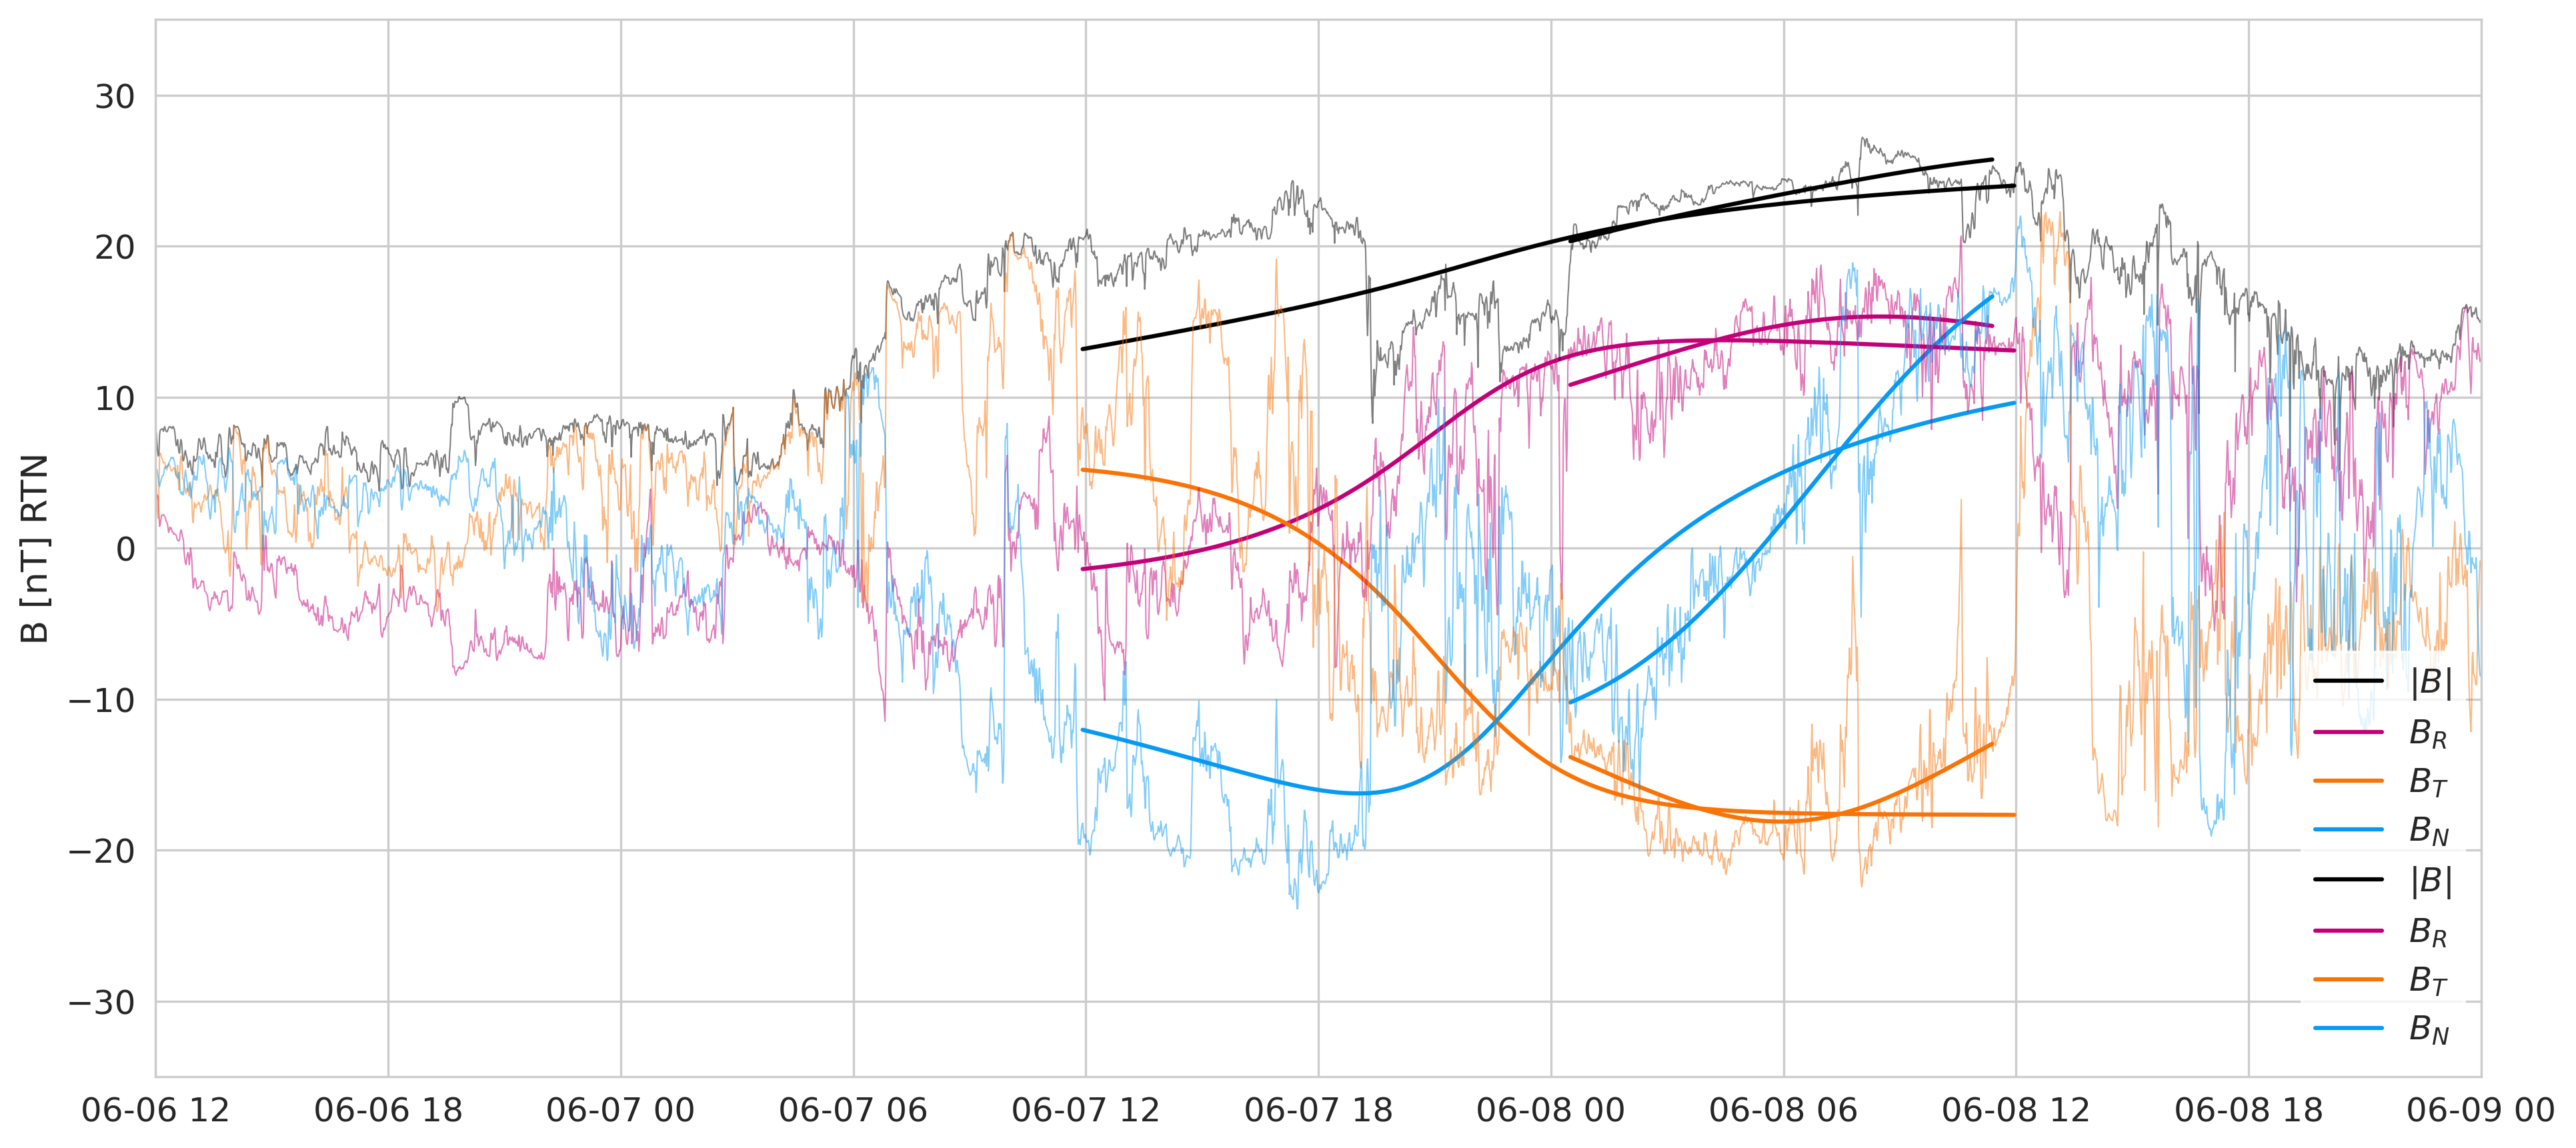

In [7]:
%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure(1,figsize=(15, 7),dpi=300)

#define subplot grid
ax1 = plt.subplot2grid((1, 1), (0, 0))  

setalpha=0.5

#back
ax1.plot(t1, btot1, color=C0, label="$|B|$")
ax1.plot(t1, bxyz1[:, 0], color=C1, label="$B_R$")
ax1.plot(t1, bxyz1[:, 1], color=C2, label="$B_T$")
ax1.plot(t1, bxyz1[:, 2], color=C3, label="$B_N$")


#all
ax1.plot(t2, btot2, color=C0, label="$|B|$")
ax1.plot(t2, bxyz2[:, 0], color=C1, label="$B_R$")
ax1.plot(t2, bxyz2[:, 1], color=C2, label="$B_T$")
ax1.plot(t2, bxyz2[:, 2], color=C3, label="$B_N$")



ax1.plot(sm.time, sm.bt, color=C0,lw=0.5,alpha=setalpha)
ax1.plot(sm.time, sm.bx, color=C1,lw=0.5,alpha=setalpha)
ax1.plot(sm.time, sm.by, color=C2,lw=0.5,alpha=setalpha)
ax1.plot(sm.time, sm.bz, color=C3,lw=0.5,alpha=setalpha)


ax1.legend(loc="lower right", fontsize=12,ncol=1,edgecolor='white')
#ax4.set_ylabel('Solar Orbiter B [nT] RTN')
ax1.set_ylabel('B [nT] RTN',fontsize=13)
ax1.set_xlim(datetime.datetime(2020,6,6,12,0),datetime.datetime(2020,6,9,0,0))
ax1.set_ylim(-35,35)

ax1.tick_params(labelsize=12)


plt.savefig('results/telloni_2021/fit_insitu_june7_2020.pdf',bbox_inches='tight')
plt.savefig('results/telloni_2021/fit_insitu_june7_2020.png', dpi=200)#,bbox_inches='tight')



### simple position plot

failed to check existing file "ftp://spiftp.esac.esa.int/data/SPICE/BEPICOLOMBO/kernels/spk/bc_mpo_fcp_00079_20181020_20251102_v01.bsp" (400 Client Error: Bad Request for url: ftp://spiftp.esac.esa.int/data/SPICE/BEPICOLOMBO/kernels/spk/bc_mpo_fcp_00079_20181020_20251102_v01.bsp)
failed to check existing file "ftp://spiftp.esac.esa.int/data/SPICE/BEPICOLOMBO/kernels/fk/bc_sci_v06.tf" (400 Client Error: Bad Request for url: ftp://spiftp.esac.esa.int/data/SPICE/BEPICOLOMBO/kernels/fk/bc_sci_v06.tf)


current frame_time_num 2020-06-07 00:00:00+00:00


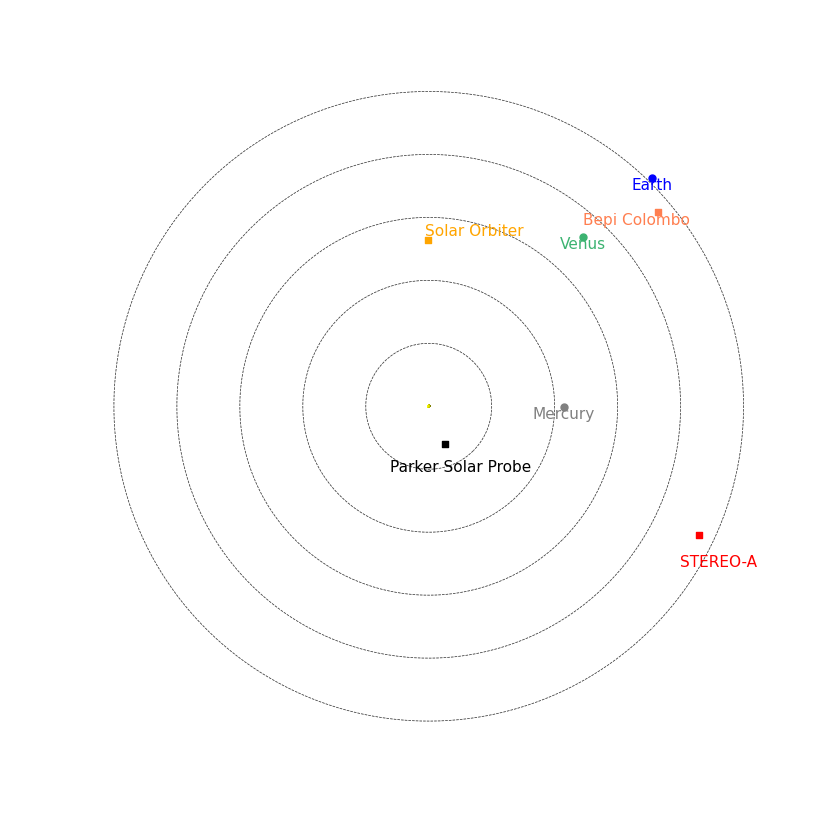

In [8]:
sns.set_style('whitegrid')
fig = plt.figure(1,figsize=(19.2, 10.8),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((1, 1), (0, 0),projection='3d')  

######### tilted view
plot_configure(ax1, view_azim=40, view_elev=90, view_radius=.8)

#impact time of CME at solar orbiter 
ti = datetime.datetime(2020, 6, 7, 0,0,0)

#plot_3dcore(ax1, model_obj, TP_B, color=C_B)
#plot_3dcore_field(ax1, model_obj, color=C_A, steps=400, step_size=0.0005, lw=1.0, ls="-")
plot_traj(ax1, "Earth", ti, frame="HCI", color=earth_color)
plot_traj(ax1, "Venus", ti, frame="HCI", color=venus_color)
plot_traj(ax1, "Mercury", ti, frame="HCI", color=mercury_color)
plot_traj(ax1, "SOLO", ti, frame="HCI", color=solo_color,marker='s')
plot_traj(ax1, "PSP", ti, frame="HCI", color=psp_color,marker='s')
plot_traj(ax1, "STA", ti, frame="HCI", color=sta_color,marker='s')
plot_traj(ax1, "BEPI", ti, frame="HCI", color=bepi_color,marker='s')


frame_time_num=mdates.date2num(ti) 
print( 'current frame_time_num', str(mdates.num2date(frame_time_num)))

#these have their own times
dct=frame_time_num-psp_numtime
psp_timeind=np.argmin(abs(dct))

dct=frame_time_num-bepi_numtime
bepi_timeind=np.argmin(abs(dct))

dct=frame_time_num-solo_numtime
solo_timeind=np.argmin(abs(dct))

dct=frame_time_num-sta_numtime
sta_timeind=np.argmin(abs(dct))

#all same times
dct=frame_time_num-earth_numtime
earth_timeind=np.argmin(abs(dct))


fsize=15


#planet and spacecraft labels

ax1.text(earth.x[earth_timeind],earth.y[earth_timeind],earth.z[earth_timeind],'Earth', color=earth_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax1.text(venus.x[earth_timeind],venus.y[earth_timeind],venus.z[earth_timeind],'Venus', color=venus_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax1.text(mercury.x[earth_timeind],mercury.y[earth_timeind],mercury.z[earth_timeind],'Mercury', color=mercury_color, ha='center',fontsize=fsize-4,verticalalignment='top')

ax1.text(psp.x[psp_timeind],psp.y[psp_timeind]+0.07,psp.z[psp_timeind],'Parker Solar Probe', color=psp_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax1.text(solo.x[solo_timeind]-0.15,solo.y[solo_timeind]+0.07,solo.z[solo_timeind],'Solar Orbiter', color=solo_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax1.text(bepi.x[bepi_timeind]+0.05,bepi.y[bepi_timeind]-0.05,bepi.z[bepi_timeind],'Bepi Colombo', color=bepi_color, ha='center',fontsize=fsize-4,verticalalignment='top')
ax1.text(sta.x[sta_timeind],sta.y[sta_timeind]+0.09,sta.z[sta_timeind],'STEREO-A', color=sta_color, ha='center',fontsize=fsize-4,verticalalignment='top')

#1 AU circle
p=np.arange(0,2*np.pi,0.01)
r1=1.0
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
r1=0.8
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
r1=0.6
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
r1=0.4
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
r1=0.2
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )


#a_circle = plt.Circle((0, 0), 1.1,fill=False,zorder=3,linestyle='-')
#ax1.add_artist(a_circle)
plt.savefig('results/plots/positions_solo_apr2020_event_hci.png', dpi=100,bbox_inches='tight')

#plt.savefig('results/plots/positions_solo_apr2020_event_tilt.png', dpi=100,bbox_inches='tight')

## model plot 
 


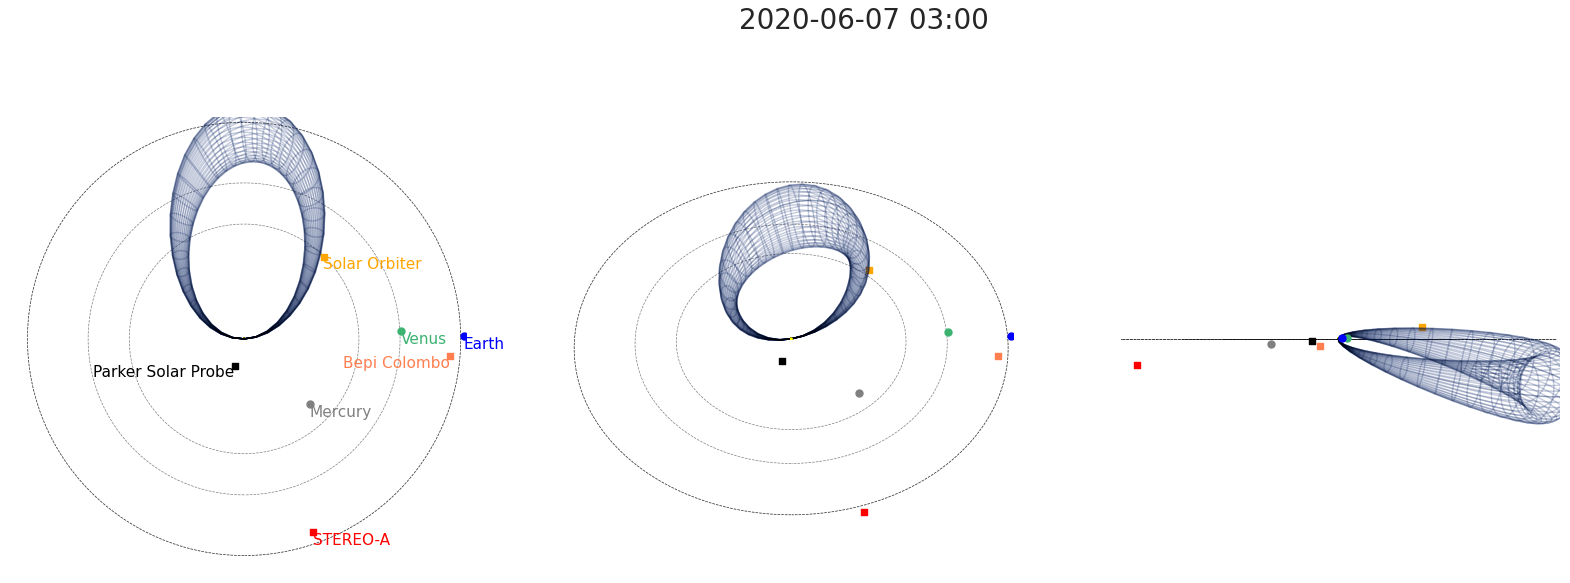

In [10]:
#for field line plots stepsize and initial point for drawing    
field_stepsize=0.001    
q1=np.array([1, .1, np.pi/2])


sns.set_style('whitegrid')
fig = plt.figure(1,figsize=(20, 7),dpi=100)

#define subplot grid
ax1 = plt.subplot2grid((1, 3), (0, 0),projection='3d')  
ax2 = plt.subplot2grid((1, 3), (0, 1),projection='3d')  
ax3 = plt.subplot2grid((1, 3), (0, 2),projection='3d')  


########### top view panel
plot_configure2(ax1, view_azim=90, view_elev=90, view_radius=.65)
plot_3dcore(ax1, model_obj2, TP_B, color=C_B)
plot_3dcore(ax1, model_obj, TP_B, color='black')

#plot_3dcore_field(ax2, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)

plot_traj(ax1, "Earth", TP_B, frame="HCI", color=earth_color)
plot_traj(ax1, "Venus", TP_B, frame="HCI", color=venus_color)
plot_traj(ax1, "Mercury", TP_B, frame="HCI", color=mercury_color)
plot_traj(ax1, "SOLO", TP_B, frame="HCI", color=solo_color,marker='s')
plot_traj(ax1, "PSP", TP_B, frame="HCI", color=psp_color,marker='s')
plot_traj(ax1, "STA", TP_B, frame="HCI", color=sta_color,marker='s')
plot_traj(ax1, "BEPI", TP_B, frame="HCI", color=bepi_color,marker='s')

#plot_shift(ax2,0.62,-0.2,0.2,0)




######### tilted view
plot_configure2(ax2, view_azim=90, view_elev=50, view_radius=.65)
plot_3dcore(ax2, model_obj2, TP_B, color=C_B)
plot_3dcore(ax2, model_obj, TP_B, color='black')

#plot_3dcore_field(ax1, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)
#plot_3dcore_field(ax1, model_obj, color=C_B, step_size=0.005, lw=1.1, ls="-",q0=np.array([0.5, .1, np.pi/2]))

plot_traj(ax2, "Earth", TP_B, frame="HCI", color=earth_color)
plot_traj(ax2, "Venus", TP_B, frame="HCI", color=venus_color)
plot_traj(ax2, "Mercury", TP_B, frame="HCI", color=mercury_color)
plot_traj(ax2, "SOLO", TP_B, frame="HCI", color=solo_color,marker='s')
plot_traj(ax2, "PSP", TP_B, frame="HCI", color=psp_color,marker='s')
plot_traj(ax2, "STA", TP_B, frame="HCI", color=sta_color,marker='s')
plot_traj(ax2, "BEPI", TP_B, frame="HCI", color=bepi_color,marker='s')

#plot_shift(ax1,0.3,-0.5,0.5,0)

############### edge on view panel
plot_configure2(ax3, view_azim=90+90, view_elev=0, view_radius=.65)
plot_3dcore(ax3, model_obj2, TP_B, color=C_B)
plot_3dcore(ax3, model_obj, TP_B, color='black')

#plot_3dcore_field(ax3, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)


plot_traj(ax3, "Earth", TP_B, frame="HCI", color=earth_color)
plot_traj(ax3, "Venus", TP_B, frame="HCI", color=venus_color)
plot_traj(ax3, "Mercury", TP_B, frame="HCI", color=mercury_color)
plot_traj(ax3, "SOLO", TP_B, frame="HCI", color=solo_color,marker='s')
plot_traj(ax3, "PSP", TP_B, frame="HCI", color=psp_color,marker='s')
plot_traj(ax3, "STA", TP_B, frame="HCI", color=sta_color,marker='s')
plot_traj(ax3, "BEPI", TP_B, frame="HCI", color=bepi_color,marker='s')

#plot_shift(ax3,0.4,-0.2,0.2,0)



#1 AU circle
p=np.arange(0,2*np.pi,0.01)
r1=1.0
ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
ax2.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
ax3.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )

#panel labels
#plt.annotate('(a)',[0.00,0.93],xycoords='figure fraction',fontsize=20)
#plt.annotate('(b)',[0.69,0.93],xycoords='figure fraction',fontsize=20)
#plt.annotate('(c)',[0.69,0.32],xycoords='figure fraction',fontsize=20)
#plt.annotate('(d)',[0.00,0.32],xycoords='figure fraction',fontsize=20)
#plt.annotate('(e)',[0.345,0.32],xycoords='figure fraction',fontsize=20)


#current time
plt.annotate(parse_time(TP_B).iso[0:16],[0.55,0.95],ha='center',xycoords='figure fraction',fontsize=20)


#planet and spacecraft labels

ax1.text(earth.x[earth_timeind],earth.y[earth_timeind],earth.z[earth_timeind],'Earth', color=earth_color, ha='left',fontsize=fsize-4,verticalalignment='top')
ax1.text(solo.x[solo_timeind],solo.y[solo_timeind],solo.z[solo_timeind],'Solar Orbiter', color=solo_color, ha='left',fontsize=fsize-4,verticalalignment='top')
ax1.text(venus.x[earth_timeind],venus.y[earth_timeind],venus.z[earth_timeind],'Venus', color=venus_color, ha='left',fontsize=fsize-4,verticalalignment='top')
ax1.text(mercury.x[earth_timeind],mercury.y[earth_timeind],mercury.z[earth_timeind],'Mercury', color=mercury_color, ha='left',fontsize=fsize-4,verticalalignment='top')

ax1.text(psp.x[psp_timeind],psp.y[psp_timeind],psp.z[psp_timeind],'Parker Solar Probe', color=psp_color, ha='right',fontsize=fsize-4,verticalalignment='top')
ax1.text(bepi.x[bepi_timeind],bepi.y[bepi_timeind],bepi.z[bepi_timeind],'Bepi Colombo', color=bepi_color, ha='right',fontsize=fsize-4,verticalalignment='top')
ax1.text(sta.x[sta_timeind],sta.y[sta_timeind],sta.z[sta_timeind],'STEREO-A', color=sta_color, ha='left',fontsize=fsize-4,verticalalignment='top')



#plt.annotate(parse_time(t_launch).iso[0:16],[0.55,0.35],ha='center',xycoords='figure fraction',fontsize=20)
plt.savefig('results/telloni_2021/visual_june7_2020.pdf',bbox_inches='tight')
plt.savefig('results/telloni_2021/visual_june7_2020.png', dpi=200)#,bbox_inches='tight')


## Animation

In [32]:
def make_frame(k):
    

    #for field line plots stepsize and initial point for drawing    
    field_stepsize=0.001    
    q1=np.array([1, .1, np.pi/2])

    sns.set_style('whitegrid')
    fig = plt.figure(1,figsize=(20, 7),dpi=100)

    #define subplot grid
    ax1 = plt.subplot2grid((1, 3), (0, 0),projection='3d')  
    ax2 = plt.subplot2grid((1, 3), (0, 1),projection='3d')  
    ax3 = plt.subplot2grid((1, 3), (0, 2),projection='3d')  
    #ax4 = plt.subplot2grid((4, 3), (2, 0))  
    #ax5 = plt.subplot2grid((4, 3), (3, 0))  
    #ax6 = plt.subplot2grid((4, 3), (3, 1))  
    #ax7 = plt.subplot2grid((4, 3), (3, 2))  


    #manually set axes positions
    #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_position.html#matplotlib.axes.Axes.set_position
    #ax1.set_position([0,0.3,0.6,0.65], which='both')
    #ax2.set_position([0.65,0.35,0.35,0.65], which='both')
    #ax3.set_position([0.6,0,0.4,0.4], which='both')
    #ax4.set_position([0.05,0.22,0.29,0.17], which='both')
    #ax6.set_position([0.05,0.03,0.29,0.17], which='both')
    #ax5.set_position([0.40,0.22,0.27,0.17], which='both')
    #ax7.set_position([0.40,0.03,0.27,0.17], which='both')


    ########### top view panel
    plot_configure2(ax1, view_azim=90, view_elev=90, view_radius=.65)
    #plot_traj(ax2, "PSP", tlist[k], frame="ECLIPJ2000", color="k", traj_pos=False, traj_major=None, traj_minor=144,lw=1.5)
    plot_3dcore(ax1, model_obj, tlist[k], color=C_B)
    #plot_3dcore_field(ax2, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)

    plot_traj(ax1, "Earth", tlist[k], frame="HCI", color=earth_color)
    plot_traj(ax1, "Venus", tlist[k], frame="HCI", color=venus_color)
    plot_traj(ax1, "Mercury", tlist[k], frame="HCI", color=mercury_color)
    plot_traj(ax1, "SOLO", tlist[k], frame="HCI", color=solo_color,marker='s')
    plot_traj(ax1, "PSP", tlist[k], frame="HCI", color=psp_color,marker='s')
    plot_traj(ax1, "STA", tlist[k], frame="HCI", color=sta_color,marker='s')
    plot_traj(ax1, "BEPI", tlist[k], frame="HCI", color=bepi_color,marker='s')

    #plot_shift(ax2,0.62,-0.2,0.2,0)




    ######### tilted view
    plot_configure2(ax2, view_azim=90, view_elev=50, view_radius=.65)

    plot_3dcore(ax2, model_obj, tlist[k], color=C_B)
    #plot_3dcore_field(ax1, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)
    #plot_3dcore_field(ax1, model_obj, color=C_B, step_size=0.005, lw=1.1, ls="-",q0=np.array([0.5, .1, np.pi/2]))

    plot_traj(ax2, "Earth", tlist[k], frame="HCI", color=earth_color)
    plot_traj(ax2, "Venus", tlist[k], frame="HCI", color=venus_color)
    plot_traj(ax2, "Mercury", tlist[k], frame="HCI", color=mercury_color)
    plot_traj(ax2, "SOLO", tlist[k], frame="HCI", color=solo_color,marker='s')
    plot_traj(ax2, "PSP", tlist[k], frame="HCI", color=psp_color,marker='s')
    plot_traj(ax2, "STA", tlist[k], frame="HCI", color=sta_color,marker='s')
    plot_traj(ax2, "BEPI", tlist[k], frame="HCI", color=bepi_color,marker='s')

    #plot_shift(ax1,0.3,-0.5,0.5,0)

    ############### edge on view panel
    plot_configure2(ax3, view_azim=90+90, view_elev=0, view_radius=.65)
    plot_3dcore(ax3, model_obj, tlist[k], color=C_B)
    #plot_3dcore_field(ax3, model_obj, color=C_B, step_size=field_stepsize, lw=1.1, ls="-",q0=q1)


    plot_traj(ax3, "Earth", tlist[k], frame="HCI", color=earth_color)
    plot_traj(ax3, "Venus", tlist[k], frame="HCI", color=venus_color)
    plot_traj(ax3, "Mercury", tlist[k], frame="HCI", color=mercury_color)
    plot_traj(ax3, "SOLO", tlist[k], frame="HCI", color=solo_color,marker='s')
    plot_traj(ax3, "PSP", tlist[k], frame="HCI", color=psp_color,marker='s')
    plot_traj(ax3, "STA", tlist[k], frame="HCI", color=sta_color,marker='s')
    plot_traj(ax3, "BEPI", tlist[k], frame="HCI", color=bepi_color,marker='s')

    #plot_shift(ax3,0.4,-0.2,0.2,0)



    #1 AU circle
    p=np.arange(0,2*np.pi,0.01)
    r1=1.0
    ax1.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    ax2.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )
    ax3.plot(r1*np.sin(p),r1*np.cos(p),0,lw=0.5,color='black', alpha=0.5,linestyle='--',zorder=0 )


    #panel labels
    #plt.annotate('(a)',[0.00,0.93],xycoords='figure fraction',fontsize=20)
    #plt.annotate('(b)',[0.69,0.93],xycoords='figure fraction',fontsize=20)
    #plt.annotate('(c)',[0.69,0.32],xycoords='figure fraction',fontsize=20)
    #plt.annotate('(d)',[0.00,0.32],xycoords='figure fraction',fontsize=20)
    #plt.annotate('(e)',[0.345,0.32],xycoords='figure fraction',fontsize=20)



    #current time
    plt.annotate(parse_time(tlist[k]).iso[0:16],[0.55,0.95],ha='center',xycoords='figure fraction',fontsize=20)



    #planet and spacecraft labels

    ax1.text(earth.x[earth_timeind],earth.y[earth_timeind],earth.z[earth_timeind],'Earth', color=earth_color, ha='left',fontsize=fsize-4,verticalalignment='top')
    ax1.text(solo.x[solo_timeind],solo.y[solo_timeind],solo.z[solo_timeind],'Solar Orbiter', color=solo_color, ha='left',fontsize=fsize-4,verticalalignment='top')
    ax1.text(venus.x[earth_timeind],venus.y[earth_timeind],venus.z[earth_timeind],'Venus', color=venus_color, ha='left',fontsize=fsize-4,verticalalignment='top')
    ax1.text(mercury.x[earth_timeind],mercury.y[earth_timeind],mercury.z[earth_timeind],'Mercury', color=mercury_color, ha='left',fontsize=fsize-4,verticalalignment='top')

    ax1.text(psp.x[psp_timeind],psp.y[psp_timeind],psp.z[psp_timeind],'Parker Solar Probe', color=psp_color, ha='right',fontsize=fsize-4,verticalalignment='top')
    ax1.text(bepi.x[bepi_timeind],bepi.y[bepi_timeind],bepi.z[bepi_timeind],'Bepi Colombo', color=bepi_color, ha='right',fontsize=fsize-4,verticalalignment='top')
    ax1.text(sta.x[sta_timeind],sta.y[sta_timeind],sta.z[sta_timeind],'STEREO-A', color=sta_color, ha='left',fontsize=fsize-4,verticalalignment='top')

    
    framestr = '%05i' % (k)  
    plt.savefig(animdirectory+'/3dcore_solo_'+framestr+'.jpg',dpi=100)
    plt.close(2)
    print('frame:', k, 'done')


### make animation    

number of frames 576
frame: 10 done


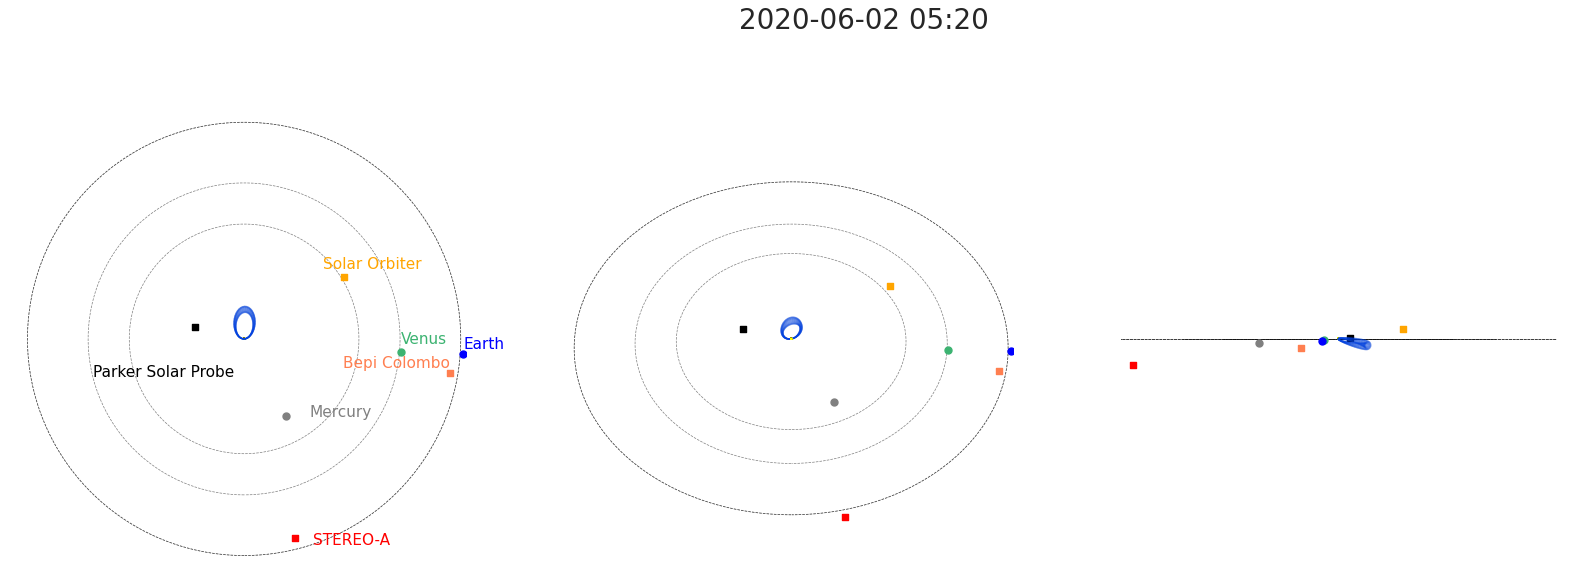

In [33]:
#time for the animation as list
tlist=[]
for i in np.arange(0,24*8*60,20):    
    tlist.append(t_launch+datetime.timedelta(minutes=float(i)))
    
print('number of frames',len(tlist))
#sns.set_style('whitegrid')


#simulation time since launch
frametime=np.round((parse_time(tlist).plot_date-parse_time(t_launch).plot_date)*24,2)

#clock computing time
starttime1=time.time()

################################## single
#make test frames
#for k in np.arange(0,10):#len(tlist)):


#for field line plots stepsize and initial point for drawing    
field_stepsize=0.001   
q1=np.array([0.95, .2, np.pi/2-0.01])

k=10
make_frame(k)

In [34]:
############################## multi
#number of processes depends on your machines memory; check with command line "top"
#how much memory is used by all your processesii
nr_of_processes_used=100
print('Using multiprocessing, nr of cores',multiprocessing.cpu_count(), \
      'with nr of processes used: ',nr_of_processes_used)

#run multiprocessing pool to make all movie frames, depending only on frame number
pool = multiprocessing.Pool(processes=nr_of_processes_used)
input=[i for i in range(len(tlist))]
pool.map(make_frame, input)
pool.close()
#pool.join()

Using multiprocessing, nr of cores 128 with nr of processes used:  100
The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
frame: 50 done
frame:frame: 172 done
 frame:frame:116  58  donedone160frame:
  132frame:done
  done

14 done
frame: 164 done
frame: 146frame:  24done 
done
frame: 56 done
frame: frame:8 2  donedone
frame:
 frame:94  110 donedone

frame: 62 doneframe:
frame:  144 frame:frame:done 1760 done
frame:
   84 done
118doneframe: 
 38doneframe:frame:  frame:28   done148
 
done190done 
done

frame: 52 frame: 168 done
doneframe:frame: 
26  doneframe:
72  122 donedone

frame: 54 done
frame: 90 done
frame:frame:frame:  88  114done
82 done 
done
frame: 152 frame: done128frame: frame:done
  frame:4670
  done 102done
 done

frame:frame:  744 frame:done 
frame: 156 done 
done32 
doneframe: 
186 done
frame:frame:frame:frame:   96frame:  done80194
 64 doneframe: done 
frame: 138frame:
done   frame: 1331989

In [35]:
#quality is b ... k
os.system('ffmpeg -r 30 -i '+animdirectory+'/3dcore_solo_%05d.jpg -b 2500k -r 30 results/telloni_2021/anim_3dcore_solo_june7_back.mp4 -y -loglevel quiet')

#print('movie finished in',np.round((time.time()-starttime1)/60,2),' minutes')  
 

0